## Identifying Drug Categories Using Patient Data

### 1.1 Project Rationale

This project explores the application of supervised machine learning techniques to classify drug types based on patient medical data.The dataset includes features such as age, gender, blood pressure, cholesterol level, and the sodium-to-potassium ratio, which are used to predict one of five possible drug categories prescribed to patients.

The given dataset contains class imbalance, evaluation metrics beyond accuracy, such as precision, recall, and weighted F1-score, were emphasized. 

A comparative analysis of multiple models including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Machine was performed. The models were evaluated using training, validation and test splits to detect overfitting and underfitting.

Confusion matrices were analyzed to identify common misclassification patterns, particularly between drugX and drugY. Further, dimensionality reduction and hyperparameter tuning were applied to improve performance. 

This study highlights the importance of model evaluation, interpretability, and thoughtful preprocessing in medical classification tasks.

Dataset :  https://www.kaggle.com/datasets/ibrahimbahbah/drug200/data

### Task 1: Data Understanding

#### Independent Variables

* `Age`        : Age of the patient (in years)	
* `Sex`        : Gender of the patient (F or M)	
* `BP`         : Blood pressure levels (LOW, NORMAL, HIGH)	
* `Cholesterol`: Cholesterol level (NORMAL or HIGH)
* `Na_to_K`    : Sodium to Potassium ratio in blood 

#### Dependent Variable 

* `Drug`       : Type of Drug prescribed to patient (drugA, drugB, drugC, drugX, drugY)

#### Prediction Task

This is a multiclass classification problem, where the objective is to accurately predict the type of drug a patient should be prescribed, based on the features such as age, sex, blood pressure, cholesterol level, and sodium-to-potassium ratio in blood.

#### 1.2 Load Dataset

In [638]:
import numpy as np               # Imported NumPy for ease and fast working on numerical operations arrays
import pandas as pd              # Imported pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Imported matplotlib for data visualization
import seaborn as sns            # Imported seaborn for statistical plots
import os                        # Imported os for interacting with the operating system (e.g., file paths, directories)


In [639]:
df = pd.read_csv("drug200.csv")            # Loading datset 
df.head(10)                                # Verify if dataset is loaded properly

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


#### 1.3 Explore the Data (EDA)

#### 1.3.1 Data Overview

In [640]:
# Checking the number of rows and columns
print(f"Number of rows (observations): {df.shape[0]}")   # As the return type of shape is tuple, calling rows and columns their index
print(f"Number of columns (features): {df.shape[1]}")

Number of rows (observations): 200
Number of columns (features): 6


In [641]:
# 2. Identifying the target variable

print(f"\nTarget variable for this supervised learning task: '{df['Drug']}'")


Target variable for this supervised learning task: '0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object'


In [642]:
# Identify categorical columns (potential label columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


Checking Distribution for Categorical Label : Sex

Column: 'Sex'
Sex
M    104
F     96
Name: count, dtype: int64
Number of unique classes in 'Sex': 2


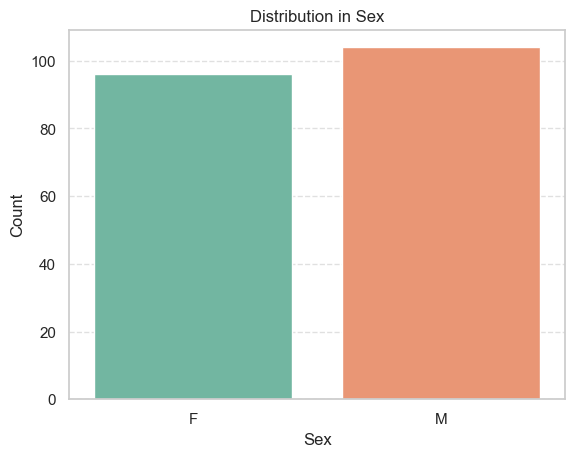

In [643]:
print("Column: 'Sex'")
print(df['Sex'].value_counts())                                     # Checking number of values in Categories variable
print(f"Number of unique classes in 'Sex': {df['Sex'].nunique()}")

# Plot
sns.countplot(x='Sex', data=df, hue='Sex', palette='Set2')          # Countplot to show the distribution of 'Sex' variable using custom colors
plt.title('Distribution in Sex')                                    # Set plot title and axis labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)                       # Add horizontal grid lines for better readability
plt.show()                                                          # Display the plot



Checking Distribution for Categorical Label : Blood Pressure

Column: 'BP'
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Number of unique classes in 'BP': 3


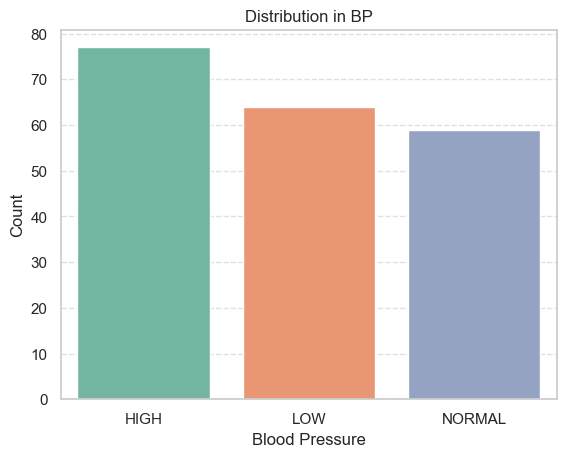

In [644]:
print("Column: 'BP'")
print(df['BP'].value_counts())                                         # Checking number of values in Categories variable
print(f"Number of unique classes in 'BP': {df['BP'].nunique()}")

# Plot                                                                 
sns.countplot(x='BP', data=df, hue='BP',palette='Set2')                # Countplot to show the distribution of 'BP' variable using custom colors 
plt.title('Distribution in BP')                                        # Set plot title and axis labels
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)                          # Add horizontal grid lines for better readability
plt.show()                                                             # Display the plot


Checking distribution for Categorical Label : Cholestrol

Column: 'Cholesterol'
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Number of unique classes in 'Cholesterol': 2


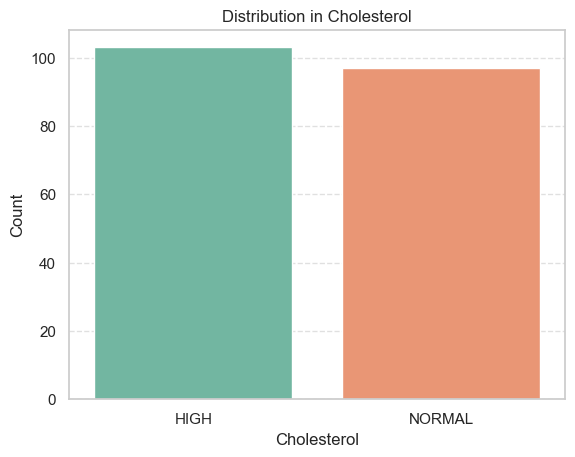

In [645]:
print("Column: 'Cholesterol'")
print(df['Cholesterol'].value_counts())                                               # Checking number of values in Categories variable
print(f"Number of unique classes in 'Cholesterol': {df['Cholesterol'].nunique()}")

# Plot
sns.countplot(x='Cholesterol', data=df, hue='Cholesterol', palette='Set2')            # Countplot to show the distribution of 'Cholesterol' variable using custom colors
plt.title('Distribution in Cholesterol')                                              # Set plot title and axis labels
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)                                         # Add horizontal grid lines for better readability
plt.show()                                                                            # Display the plot


Checking Distribution for Categorical Label : Drug

Column: 'Drug' (Target)
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Number of unique classes in 'Drug': 5


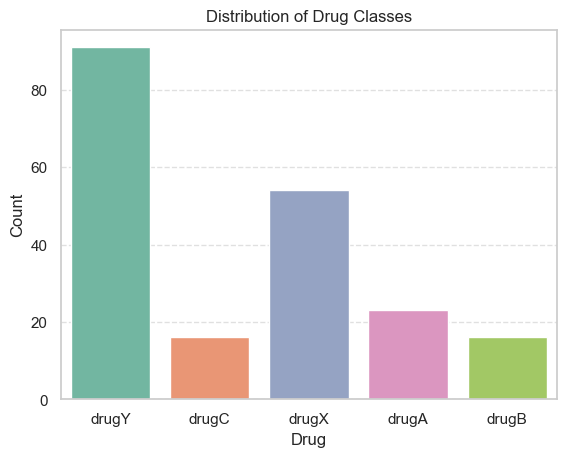

In [646]:
print("Column: 'Drug' (Target)")
print(df['Drug'].value_counts())                                        # Checking number of values in Categories variable
print(f"Number of unique classes in 'Drug': {df['Drug'].nunique()}")

# Plot
sns.countplot(x='Drug', data=df, hue='Drug', palette='Set2')            # Countplot to show the distribution of 'Drug' variable using custom colors
plt.title('Distribution of Drug Classes')                               # Set plot title and axis labels
plt.xlabel('Drug')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)                           # Add horizontal grid lines for better readability
plt.show()                                                              # Display the plot


#### 1.3.2 Feature Analysis

Descriptive statistics for numerical columns 

In [647]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Checking Distribution : Plotting Histogram for Age 

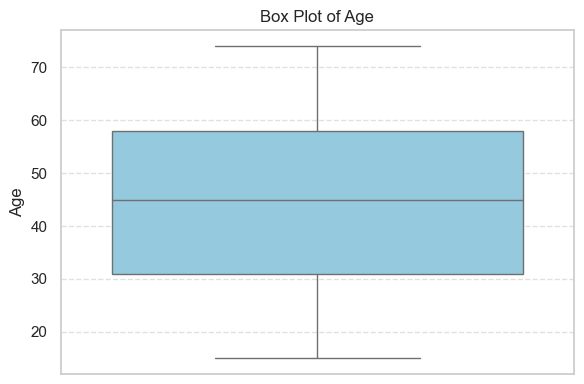

In [648]:
plt.figure(figsize=(6, 4))                                      # Adjusting the plot size
sns.boxplot(y='Age', data=df, color='skyblue')                  # Plot BoxPlot 
plt.title('Box Plot of Age')                                    # Set plot title and axis labels
plt.ylabel('Age')                                        
plt.grid(axis='y', linestyle='--', alpha=0.6)                   # Add horizontal grid lines for better readability
plt.tight_layout()
plt.show()                                                      # Display the plot


Comment: Happy to see no outliers. 

Checking Distribution : Plotting Histogram for Na to K ratio

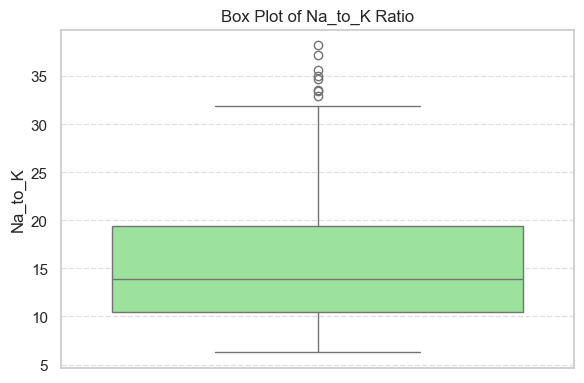

In [649]:
plt.figure(figsize=(6, 4))                                 # Adjusting the plot size
sns.boxplot(y='Na_to_K', data=df, color='lightgreen')      # Plot Boxplot
plt.title('Box Plot of Na_to_K Ratio')                     # Set plot title and axis labels
plt.ylabel('Na_to_K')                              
plt.grid(axis='y', linestyle='--', alpha=0.6)              # Add horizontal grid lines for better readability
plt.tight_layout()
plt.show()                                                 # Display the plot


Comment: We can see few outliers in Na to K Ratio hence we need to dive deep find out the reason, explore and address those outliers. 

In [650]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]

# Display count and the actual outlier rows
print(f"Number of outliers in 'Na_to_K': {outliers.shape[0]}")
print("\nOutlier rows:")
print(outliers)


Number of outliers in 'Na_to_K': 8

Outlier rows:
     Age Sex    BP Cholesterol  Na_to_K   Drug
24    33   F   LOW        HIGH   33.486  drugY
96    58   F   LOW        HIGH   38.247  drugY
98    20   M  HIGH      NORMAL   35.639  drugY
128   47   M   LOW      NORMAL   33.542  drugY
131   52   M   LOW      NORMAL   32.922  drugY
184   18   F  HIGH        HIGH   37.188  drugY
188   65   M  HIGH      NORMAL   34.997  drugY
194   46   F  HIGH        HIGH   34.686  drugY


All 8 outliers are associated with a single class: `drugY`, indicating they may carry important class-specific signals.

Removing them would likely reduce the model’s ability to learn the distinguishing characteristics of `drugY`, especially in high Na_to_K scenarios.

I plan to train and compare multiple classification models:

* Logistic Regression

* k-Nearest Neighbors (k-NN)

* Support Vector Machine (SVM)

* Decision Tree

* Random Forest

Among these, distance-based models (Logistic Regression, k-NN, SVM) are sensitive to outliers, but this effect can be mitigated by applying RobustScaler or other appropriate scaling techniques.

On the other hand, tree-based models (Decision Tree and Random Forest) are generally robust to outliers, so their performance is unlikely to be negatively impacted.

Statistically, the 8 outliers represent just 4% of the dataset (8 out of 200 rows), which is small and manageable.

Since I plan to evaluate and compare multiple ML models, keeping these outliers ensures that important edge cases are not lost, especially those associated with drugY.

There are more advantages than disadvantages in keeping the outliers. Retaining them may help capture critical signals associated with a specific class `drugY`, which supports better generalization and real-world robustness in your classifier.

#### 1.3.3 Exploring Relationship between features and target Variable

1. Drug vs. Sex

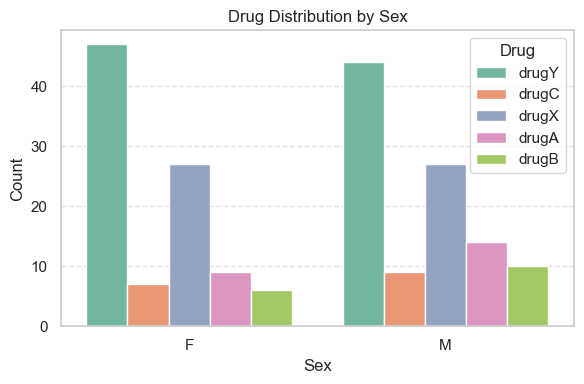

In [651]:
plt.figure(figsize=(6, 4))                                         # Adjusting the plot size
sns.countplot(x='Sex', hue='Drug', data=df, palette='Set2')        # Countplot to show the distribution of 'drug' variable using custom colors
plt.title('Drug Distribution by Sex')                              # Set plot title and axis labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)                      # Add horizontal grid lines for better readability
plt.tight_layout()
plt.show()                                                         # Display the plot


2. Drug vs. BP (Blood Pressure)

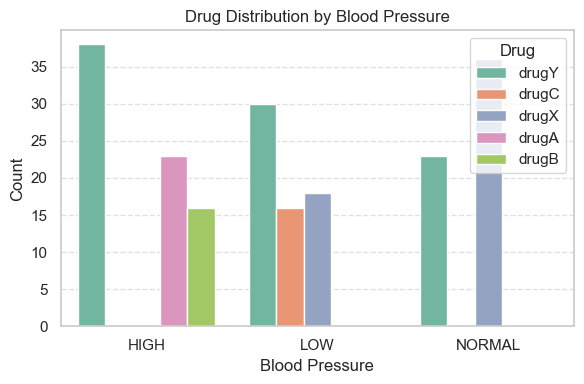

In [652]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BP', hue='Drug', data=df, palette='Set2')    # Countplot to show the distribution of 'drug' variable using custom colors
plt.title('Drug Distribution by Blood Pressure')              # Set plot title and axis labels
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)                 # Add horizontal grid lines for better readability
plt.tight_layout()
plt.show()                                                    # Display the plot


3. Drug vs. Cholesterol

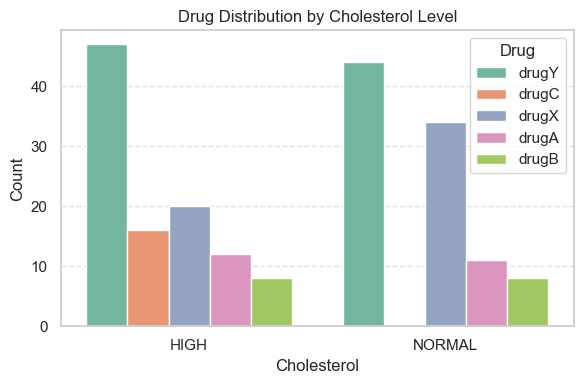

In [653]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cholesterol', hue='Drug', data=df, palette='Set2')      # Countplot to show the distribution of 'drug' variable using custom colors
plt.title('Drug Distribution by Cholesterol Level')                      # Set plot title and axis labels
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)                            # Add horizontal grid lines for better readability
plt.tight_layout()
plt.show()                                                               # Display the plot


4. Scatter Plot for numerical features with target Variable

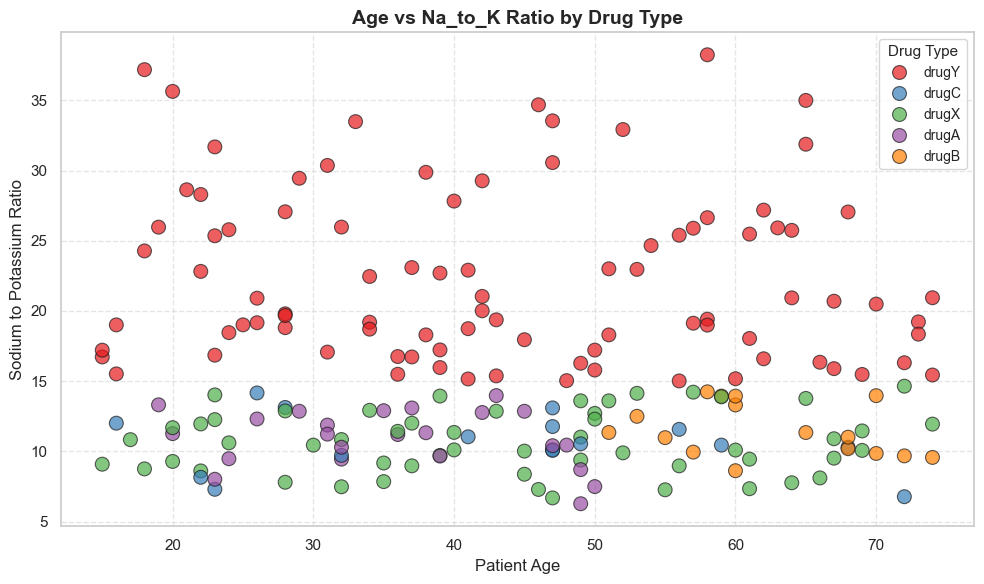

In [654]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and theme
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot: Age vs Na_to_K ratio, colored by Drug type
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Drug',
    palette='Set1',    # Bright, distinct colors for each drug class
    s=100,             # Marker size
    alpha=0.7,         # Transparency to reduce clutter
    edgecolor='k'      # Black edges for clarity
)

# Title and axis labels
plt.title('Age vs Na_to_K Ratio by Drug Type', fontsize=14, fontweight='bold')
plt.xlabel('Patient Age', fontsize=12)
plt.ylabel('Sodium to Potassium Ratio', fontsize=12)

# Improve legend
plt.legend(title='Drug Type', fontsize=10, title_fontsize=11)

# Grid and limits for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


#### 1.3.4 Data Quality Check

Check for Missing or Null Values

In [655]:
# Check for missing/null values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Check for Data Types (To Ensure Consistency)

In [656]:
# Data types of all columns
print("\nData types of columns:\n")
print(df.dtypes)


Data types of columns:

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


Checking for Out-of-Range values

For Age


In [657]:
print("\nCheck for unusual Age values:")
print(f"Min age: {df['Age'].min()}")
print(f"Max age: {df['Age'].max()}")

print(df[df['Age'] < 0])    # checking on Invalid values 
print(df[df['Age'] > 120])  # Potentially suspicious



Check for unusual Age values:
Min age: 15
Max age: 74
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []


For Na_to_K

In [658]:
print("\nCheck for unusual Na_to_K values:")
print(f"Min Na_to_K: {df['Na_to_K'].min()}")
print(f"Max Na_to_K: {df['Na_to_K'].max()}")


print(df[df['Na_to_K'] < 0])


Check for unusual Na_to_K values:
Min Na_to_K: 6.269
Max Na_to_K: 38.247
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []


 For Categorical Columns

In [659]:
# Check unique values in categorical columns
print("\nUnique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'BP':", df['BP'].unique())
print("Unique values in 'Cholesterol':", df['Cholesterol'].unique())
print("Unique values in 'Drug':", df['Drug'].unique())



Unique values in 'Sex': ['F' 'M']
Unique values in 'BP': ['HIGH' 'LOW' 'NORMAL']
Unique values in 'Cholesterol': ['HIGH' 'NORMAL']
Unique values in 'Drug': ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


Comment : The data Quality check looks absolutely perfect and good to go. 

#### 1.3.5 Summarise Finding

1. Target Variable: Drug

The target variable Drug is categorical with 5 distinct classes: `drugA`, `drugB`, `drugC`, `drugX`, and `drugY`.

The initial class distribution indicates imbalance, with `drugY` being the most frequent class.

This class imbalance can bias models toward the majority class. Therefore, I will evaluate model performance using metrics like F1-score, precision, and recall — rather than relying solely on accuracy.

2. Initial Thoughts on Data Preparation & Modeling

Since the dataset includes a mix of categorical and numerical features, the following preprocessing steps are necessary:

* One-Hot Encoding will be applied to categorical variables: Sex, BP, and Cholesterol.

* The numerical feature Na_to_K contains outliers that are important and class-specific (especially for drugY). I’ve decided to retain these outliers to preserve meaningful patterns.


3. Why I'm Using RobustScaler

`RobustScaler` is the preferred choice for scaling the numeric feature Na_to_K & Age because:

* It uses the median and interquartile range (IQR), which makes it resistant to the influence of outliers.

* In contrast, StandardScaler and MinMaxScaler rely on the mean and standard deviation, which can be skewed by extreme values.

* Models (e.g., Logistic Regression, SVM, k-NN) are sensitive to feature scaling

I find RobustScaler provides a balanced transformation without compromising the integrity of important outlier information. Thus making choice of moving ahead with it.

### Task 2: Data Preparation & Modeling

#### 2.1 Splitting the data

According to Kumar summarized in a conference publication, when a dataset size is between 100 and 1,000 samples. 60% training / 20% validation / 20% test split is recommended for model development and hyperparameter tuning (Muraina, 2022).

My dataset contain 200 rows and 6 columns hence, choosed to go with 60-20-20 split.


Citation : https://www.researchgate.net/publication/358284895_IDEAL_DATASET_SPLITTING_RATIOS_IN_MACHINE_LEARNING_ALGORITHMS_GENERAL_CONCERNS_FOR_DATA_SCIENTISTS_AND_DATA_ANALYSTS
‌


In [660]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Separate features (X) and target (y)
X = df.drop(['Drug'], axis=1)
y = df['Drug']

# Step 2: First split → Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Step 3: Second split → Validation (20%) and Test (20%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Verifying set sizes
print(f"Training set: {X_train.shape[0]} rows")
print(f"Validation set: {X_val.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")


Training set: 120 rows
Validation set: 40 rows
Test set: 40 rows


#### 2.2 Preprocessing and Feature Engineering

#### Why I Chose to Keep Age and Na_to_K as Continuous Variables (instead of Binning) 

During my exploration of similar projects and discussions on the Kaggle community, I observed that some developers bin continuous variables like Age and Na_to_K ratio into discrete categories. However, I decided not to bin these features and instead retain their continuous form, for the following reasons:

##### 1. Binning reduces data resolution. For e.g.

* An Age of 49 and 40 would fall into the same bin (40–49), though they may represent different clinical or pharmacological risks.

* A Na_to_K value of 29.9 vs 20.1 would both fall into the “20–30” bin, though they may have significantly different implications for classification, 

##### 2. Model Compatibility with Continuous Features

Algorithms such as:

Logistic Regression, Support Vector Machine (SVM), Random Forest, Decision Tree are designed to handle and work on continuous variables directly.

##### 3. Avoiding Biases 

* Binning requires manually setting cutoff values, which may introduce subjective or arbitrary biases.

* By keeping the data continuous, I allow the model to discover data-driven decision boundaries that may perform better.

##### 4. Retaining Original Data Interpretability

* Binning often sacrifices important distributional signals, which can:

* Hide subtle trends or patterns,

* Weaken the interpretability of numeric variables that have clinical or risk significance.

##### Conclusion 

Keeping Age and Na_to_K as continuous variables preserves the richness and variability of the data. Thus avoiding introducing arbitrary thresholds that may distort true relationships.



#### 2.2 Transformation

Encode Categorical Variables 

As ML models can’t handle strings directly, so using One-Hot Encoding features:

* Sex
* BP
* Cholesterol


Feature Scaling using RobustScaler

* Used RobustScaler on numeric features ( Na_to_K, Age )

Reason detailed explanation in section 1.3.5 Summarise Finding 

`ColumnTransformer` to ensure model is robust, maintainable and reproducible.

In [661]:
# Importing lib for performing feature scaling & model transformation 

from sklearn.compose import ColumnTransformer                        
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Creating a ColumnTransformer to apply different transformations to numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), ['Age', 'Na_to_K']),                             # RobustScaler is used to scale numeric features while minimizing the effect of outliers
        ('cat', OneHotEncoder(drop='first'), ['Sex', 'BP', 'Cholesterol'])       # Used Dropped first to avoid dummy variable trap 
    ]
)



### 2.3 Feature Encoding/Representation

In [662]:
# Fitting the preprocessor on the training data and transforming training, validation, and test sets
X_train_prepared = preprocessor.fit_transform(X_train)            # Fit & transform training data
X_val_prepared = preprocessor.transform(X_val)                    # Transform validation data
X_test_prepared = preprocessor.transform(X_test)                  # Transform test data



  #### 2.4 Feature Selection

In this dataset, we have 5 features, each contributing distinct characteristics that are medically relevant for predicting the prescribed drug type. Given their individual importance and domain significance, we have decided to retain all features for modeling without excluding any at this stage. 

### 2.5 Model Training
#### 1. Logistic Regression


c:\Users\SAAD KHAN\anaconda3\envs\data_analytics\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Train Set Performance:
              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93        14
       drugB       0.75      1.00      0.86         9
       drugC       0.91      1.00      0.95        10
       drugX       0.91      0.97      0.94        32
       drugY       1.00      0.85      0.92        55

    accuracy                           0.93       120
   macro avg       0.89      0.96      0.92       120
weighted avg       0.94      0.93      0.93       120



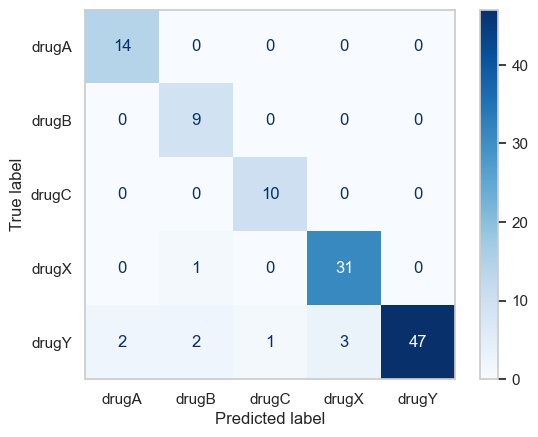

In [663]:
# Train Logistic Regression
log_reg = LogisticRegression(
    multi_class='multinomial',              # Specified multiclass strategy
    solver='lbfgs',                         # Efficient solver for multinomial loss
    max_iter=1000,                          # Increase iterations to ensure convergence
    random_state=42,                        # For reproducibility
    class_weight='balanced'                 # Adjusts weights inversely proportional to class frequencies
)

# Fit the model on the preprocessed training data
log_reg.fit(X_train_prepared, y_train)


# 4. Evaluate on Train Set
y_train_pred = log_reg.predict(X_train_prepared)
print("Logistic Regression - Train Set Performance:")
print(classification_report(y_train, y_train_pred))
train_f1_Logistic_Regression = f1_score(y_train, y_train_pred, average='weighted')

# 2. Evaluated on validation set so later on can compare results for over-fitting / underfitting 
y_val_pred = log_reg.predict(X_val_prepared)
validation_f1_Logistic_Regression = f1_score(y_val, y_val_pred, average='weighted')


# 6. Plot Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)      # Plot Confusion Matrix 
disp.plot(cmap='Blues')                                                                  # Use a blue color palette for better visibility
plt.grid(False)                                                                          # Disable grid lines
plt.show()

### 2. Random Forest

Random Forest - Train Set Performance:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        32
       drugY       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



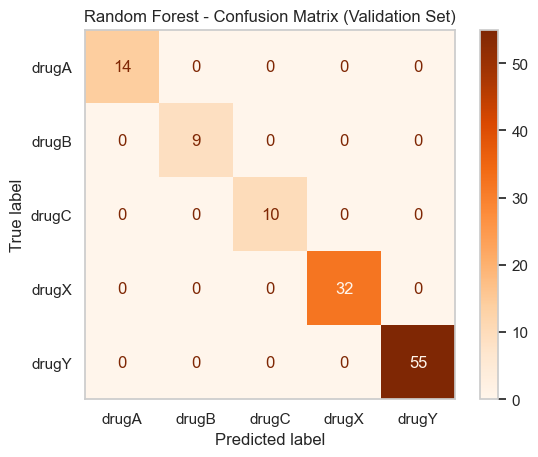

In [664]:
# Import Random Forest Classifier and necessary evaluation tools

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Random Forest with balanced class weights and reproducibility
rf = RandomForestClassifier(
    n_estimators=100,          # Use 100 trees inital decent balance of performance and speed
    criterion='gini',          # Gini Impurity works well in terms of speed due to similar formula when compared to entropy
    max_depth=5,               # Constrain tree depth
    min_samples_leaf=3,        # Require more samples in leaf nodes
    class_weight='balanced',   # As we are having class imbalance 
    random_state=42
)

# Train on prepared training data
rf.fit(X_train_prepared, y_train)

# Predict on train set
y_train_pred = rf.predict(X_train_prepared)

# Evaluate
print("Random Forest - Train Set Performance:")
print(classification_report(y_train, y_train_pred))
train_f1_Random_Forest = f1_score(y_train, y_train_pred, average='weighted')

# 2. Evaluated on validation set so later on can compare results for over-fitting / underfitting 
y_val_pred = rf.predict(X_val_prepared)
validation_f1_Random_Forest = f1_score(y_val, y_val_pred, average='weighted')


# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Oranges')
plt.title("Random Forest - Confusion Matrix (Validation Set)")
plt.grid(False)                                                      # Disable grid lines
plt.show()

The model achieves 100% accuracy on the training set because Random Forest is an ensemble of decision trees that can perfectly memorize the training data by growing trees until all samples are correctly classified.

This behavior is expected at this initial stage since I am evaluating the model's performance on the same training data used for fitting. It serves as a sanity check to ensure the model is capable of learning the patterns in the data.

### 3. Support Vector Machine (SVM)

SVM - Train Set Performance:
              precision    recall  f1-score   support

       drugA       0.93      1.00      0.97        14
       drugB       0.90      1.00      0.95         9
       drugC       0.91      1.00      0.95        10
       drugX       0.86      1.00      0.93        32
       drugY       1.00      0.85      0.92        55

    accuracy                           0.93       120
   macro avg       0.92      0.97      0.94       120
weighted avg       0.94      0.93      0.93       120



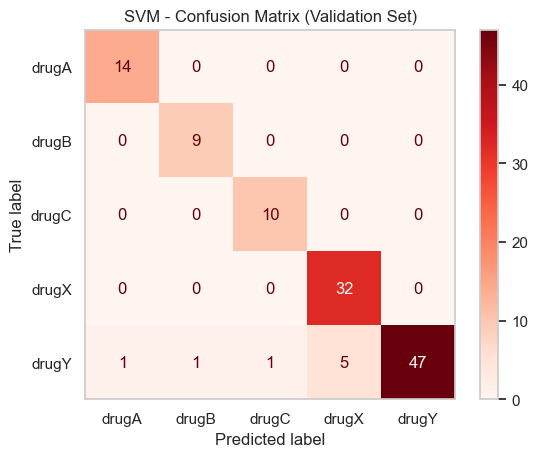

In [665]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
 

# Initialize and train the model
svm = SVC(
    kernel='rbf',
    C=1.0,                      # C= 1 Regularization parameter balancing margin maximization and misclassification
    gamma='scale',              # Kernel coefficient for RBF, adjusts influence of single training points
    class_weight='balanced',    # Handle class imbalance by adjusting weights inversely proportional to class frequencies
    random_state=42,            # For reproducibility
    probability=True            # Enables probability estimates for potential further use (e.g., ROC curve)
)
svm.fit(X_train_prepared, y_train)

# Predict on validation set
y_train_pred = svm.predict(X_train_prepared)

# Evaluate
print("SVM - Train Set Performance:")
print(classification_report(y_train, y_train_pred))
train_f1_SVM = f1_score(y_train, y_train_pred, average='weighted')

# 2. Evaluated on validation set so later on can compare results for over-fitting / underfitting 
y_val_pred = svm.predict(X_val_prepared)
validation_f1_SVM = f1_score(y_val, y_val_pred, average='weighted')


# Plot confusion matrix for training set predictions
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Reds')                                                             # Red to distinguish from other models
plt.title("SVM - Confusion Matrix (Validation Set)")
plt.grid(False)                                                                    # Disable grid lines
plt.show()

### 4. K-nearest neighbor algorithm (KNN)

KNN - Train Set Performance:
              precision    recall  f1-score   support

       drugA       0.80      0.86      0.83        14
       drugB       0.64      0.78      0.70         9
       drugC       0.91      1.00      0.95        10
       drugX       0.89      1.00      0.94        32
       drugY       0.98      0.84      0.90        55

    accuracy                           0.89       120
   macro avg       0.84      0.89      0.86       120
weighted avg       0.90      0.89      0.89       120



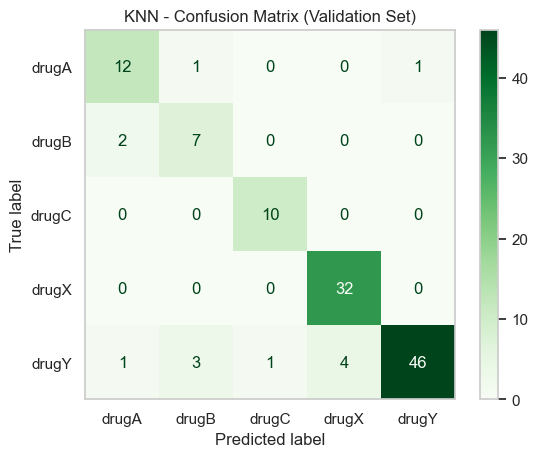

In [666]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)      # n =5: Number of neighbors to consider for voting (common default for inital exploration)
knn.fit(X_train_prepared, y_train)                        # n_jobs = 1: Use all available CPU cores to speed up computation

# Predict on validation set
y_train_pred = knn.predict(X_train_prepared)

# Evaluate
print("KNN - Train Set Performance:")
print(classification_report(y_train, y_train_pred))
train_f1_KNN = f1_score(y_train, y_train_pred, average='weighted')

# Evaluated on validation set so later on can compare results for over-fitting / underfitting 
y_val_pred = knn.predict(X_val_prepared)
validation_f1_KNN = f1_score(y_val, y_val_pred, average='weighted')

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Greens')
plt.title("KNN - Confusion Matrix (Validation Set)")
plt.grid(False)                                            # Disable grid lines
plt.show()

### 5. Decision Tree

Decision Tree - Train Set Performance:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        32
       drugY       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



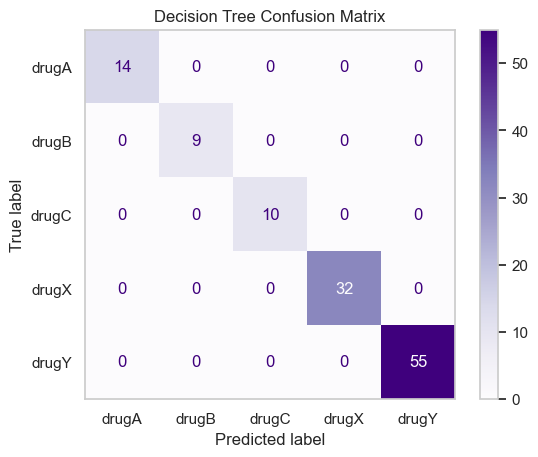

In [667]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(
    class_weight='balanced',                       # Helps to handle class imbalance by adjusting weights inversely proportional to class frequencies
    random_state=42                                # For reproducibility of results
)
# Train the model
dt.fit(X_train_prepared, y_train)

# Predictions
y_train_pred = dt.predict(X_train_prepared)

# Evaluation
print("Decision Tree - Train Set Performance:")
print(classification_report(y_train, y_train_pred))
train_f1_Decision_Tree = f1_score(y_train, y_train_pred, average='weighted')

# Evaluated on validation set so later on can compare results for over-fitting / underfitting 
y_val_pred = dt.predict(X_val_prepared)
validation_f1_Decision_Tree = f1_score(y_val, y_val_pred, average='weighted')


#Confusion Matrix Plot
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.grid(False)                                            # Disable grid lines
plt.show()


The model achieves 100% accuracy on the training set because Decision Trees have the ability to fully memorize the training data by splitting until all samples are perfectly classified (especially with no maximum depth set and minimum samples per leaf as 1). This leads to a perfectly fitted model on the training data, which is expected behavior at this stage of training.

Based on the accuracy and confusion Matrix across all Models we have good intial learning from decent setting. Moving forward, further hyperparameter tuning and validation will help optimize generalization and mitigate any overfitting risks.

### Task 3. Evaluation

#### 3.1 Selecting Evaluation Metrics

#### Reason for Selecting F1 Score as the Evaluation Metric

From the EDA performed previously, we observed class imbalance in Drug Types, as shown in the figure below. Therefore, using accuracy is not an optimal choice.

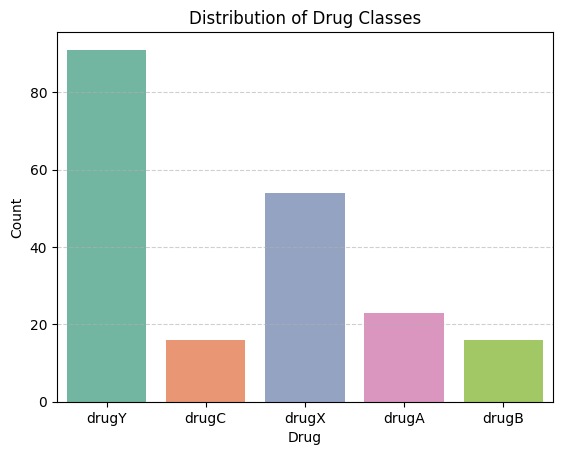

I read several research papers wrt multi-class classification:

1. Lipton, Z. C., Elkan, C., & Narayanaswamy, B. (2014). *Thresholding Classifiers to Maximize F1 Score*. arXiv:1402.1892  
2. Opitz, J., & Burst, S. (2019). *Macro F1 and macro F1*. arXiv preprint arXiv:1911.03347  
3. Grandini, M., Bagli, E., & Visani, G. (2020). *Metrics for multi-class classification: an overview*. arXiv preprint arXiv:2008.05756  

Honestly speaking, I could not understand the majority of graphs and mathematical expressions. The only paper that made me feel like I understood something was:

- **Grandini, M., Bagli, E., & Visani, G. (2020)** – *Metrics for multi-class classification* (arXiv:2008.05756)

Generally, based on the formula, insights from the research papers, and watching a few YouTube videos, I found that the best solution for my use case and dataset type is using the **F1-score**. 

```python
                2
F1 score = ------------
             1     1
            --- + ---
             P     R
```

The formula for the F1-score is based on the **harmonic mean** of two crucial entities: **Precision** and **Recall** accounting both false positives and false negatives, which is crucial for classification tasks. 

Decision for going with `average='weighted'`for the following reasons:

Handles Class Imbalance:

Weighted F1 calculates the F1 score for each class, then takes the average weighted by support (i.e., the number of true instances per class). This is especially important when some drug classes appear more frequently than others, as it prevents majority classes from dominating the evaluation. Which is true in my case where we have more no of observation for drugY as compared to other.



3.2 Evaluate on Training vs Validation Data

1. Logistic Regression 

In [668]:
 
print(f"Train F1 Score for Logistic Regression: {train_f1_Logistic_Regression:.2f}")
print(f"Validation F1 Score for Logistic Regression: {validation_f1_Logistic_Regression:.2f}")



Train F1 Score for Logistic Regression: 0.93
Validation F1 Score for Logistic Regression: 0.90


2. Random Forest 

In [669]:
print(f"Train F1 Score for Random Forest: {train_f1_Random_Forest:.2f}")
print(f"Validation F1 Score for Random Forest: {validation_f1_Random_Forest:.2f}")


Train F1 Score for Random Forest: 1.00
Validation F1 Score for Random Forest: 0.92


3. Support Vector Machine (SVM) 

In [670]:
print(f"Train F1 Score for SVM: {train_f1_SVM:.2f}")
print(f"Validation F1 Score for SVM: {validation_f1_SVM:.2f}")

Train F1 Score for SVM: 0.93
Validation F1 Score for SVM: 0.93


4. K-nearest neighbor algorithm (KNN)

In [671]:
print(f"Train F1 Score for KNN: {train_f1_KNN:.2f}")
print(f"Validation F1 Score for KNN: {validation_f1_KNN:.2f}")

Train F1 Score for KNN: 0.89
Validation F1 Score for KNN: 0.81


5. Decision Tree

In [672]:

print(f"Train F1 Score for Decision Tree: {train_f1_Decision_Tree:.2f}")
print(f"Validation F1 Score for Decision Tree: {validation_f1_Decision_Tree:.2f}")

Train F1 Score for Decision Tree: 1.00
Validation F1 Score for Decision Tree: 0.95


#### Comparison of Training and Validation F1 Scores Across Models to Assess Generalization Performance


| Model                 | Train F1 Score | Validation F1 Score  | Gap   | 
|-----------------------|----------------|----------------------|-------|
| Decision Tree         | 1.00           | 0.95                 | 0.05  | 
| Random Forest         | 1.00           | 0.92                 | 0.05  |
| K-Nearest Neighbors   | 0.89           | 0.81                 | 0.08  |
| Support Vector Machine| 0.93           | 0.93                 | 0.00  |
| Logistic Regression   | 0.93           | 0.90                 | 0.03  |


On comparing the performance of all models, Logistic Regression shows well-balanced, but SVM edges it out in terms of generalization.

The Support Vector Machine (SVM) shows the best generalization capability, with minimum gap.


3.3 Error Analysis

* While reviewing the confusion matrices of all models, it is evident that the majority of misclassifications occurred with respect to drugY, particularly in confusion with drugX. 

* This trend is consistently observed across all models except for the Decision Tree and Random Forest classifiers. 

* This suggests that most models struggle to distinguish between drugX and drugY, possibly due to similarities in their feature patterns.


In [673]:
print(y_train.value_counts())  # Check class balance

Drug
drugY    55
drugX    32
drugA    14
drugC    10
drugB     9
Name: count, dtype: int64


Checking feature separability using PCA 

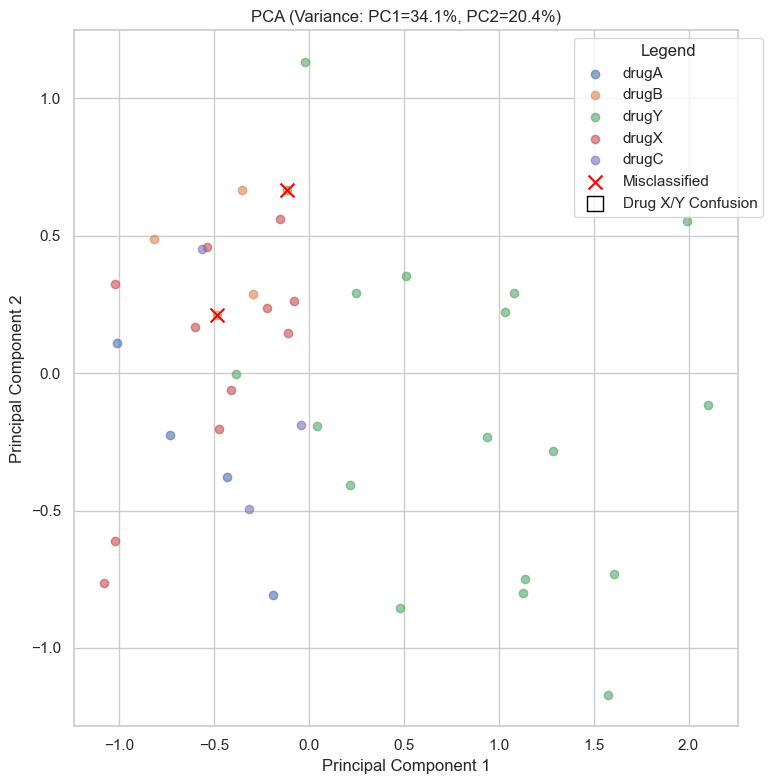

In [674]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fit PCA on training, transform validation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_prepared)  # Fit on training
X_val_pca = pca.transform(X_val_prepared)         # Transform validation

# 2. Create DataFrame with true/predicted labels
pca_df = pd.DataFrame(X_val_pca, columns=['PC1', 'PC2'])
pca_df['True_Label'] = y_val.values
pca_df['Predicted'] = y_val_pred  # Add model predictions

# 3. Plot
plt.figure(figsize=(10, 8))
for label in pca_df['True_Label'].unique():
    subset = pca_df[pca_df['True_Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6)

# Highlight misclassifications (all models)
misclassified = pca_df[pca_df['True_Label'] != pca_df['Predicted']]
plt.scatter(misclassified['PC1'], misclassified['PC2'], marker='x', color='red', s=100, label='Misclassified')

# Highlight Drug X/Y confusion
drug_xy_confusion = pca_df[
    ((pca_df['True_Label'] == 'DrugX') & (pca_df['Predicted'] == 'DrugY')) |
    ((pca_df['True_Label'] == 'DrugY') & (pca_df['Predicted'] == 'DrugX'))
]
plt.scatter(
    drug_xy_confusion['PC1'], drug_xy_confusion['PC2'], 
    marker='s', edgecolors='black', facecolors='none', s=120, 
    label='Drug X/Y Confusion'
)

plt.title(f"PCA (Variance: PC1={pca.explained_variance_ratio_[0]:.1%}, PC2={pca.explained_variance_ratio_[1]:.1%})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

The above 2D PCA plot captures ~54.5% of the total variance, which is reasonable. Also we can clearly observe the drugY and drugX are close to each other tend to misclassify. 

Lets retrieves PCA loadings to understand how each feature contributes to the principal components and ranking features by their influence on PC1 and PC2.

In [675]:
# Get feature contributions to PC1
pca_loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'],
    index=preprocessor.get_feature_names_out()  # Use your feature names
)

# Get absolute loadings for both PCs
loadings_abs = pca_loadings.abs()

# Top features for PC1 and PC2
print("Top features for PC1:")
print(loadings_abs['PC1'].sort_values(ascending=False).head(5))

print("\nTop features for PC2:")
print(loadings_abs['PC2'].sort_values(ascending=False).head(5))

Top features for PC1:
num__Na_to_K               0.965836
cat__BP_NORMAL             0.196332
cat__Cholesterol_NORMAL    0.097282
num__Age                   0.091038
cat__BP_LOW                0.077806
Name: PC1, dtype: float64

Top features for PC2:
num__Age                   0.824169
cat__BP_LOW                0.418292
cat__BP_NORMAL             0.367708
cat__Cholesterol_NORMAL    0.090986
num__Na_to_K               0.041618
Name: PC2, dtype: float64


PC1 (34.1% variance): The majority of dominance is from Na_to_K ratio, with very high loading (~0.97).

This suggests Na_to_K is the most important feature for separating classes along the first principal direction.

PC2 (20.4% variance): Influenced primarily by Age (0.82), followed by blood pressure categories.

Suggests Age and BP levels are key for the second axis of separation.


#### Why SVM is best based on PCA results:

The above PCA plot shows that the classes are fairly well separated and SVM works well in such cases.

Most of the misclassification are between just two classes (DrugX and DrugY) SVM is good at handling tricky boundaries like this.

The data looks non-linear SVM with RBF kernel is made for that.

Only a few features are really important — SVM doesn’t need all features to work well.

SVM had the same F1 score on training and validation, which means it's not overfitting and is generalizing better than other models.

#### Hyperparameter tunning SVM using GridSearchCV to find best Parameters

In [676]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings

# Ignore convergence warnings (common with SVM)
warnings.filterwarnings('ignore', category=UserWarning)

# Simplified parameter grid (only key parameters)
param_grid = {
    'C': [0.1, 1, 10],            # Regularization strength
    'gamma': ['scale', 'auto'],   # Kernel coefficient (auto=1/n_features)
    'class_weight': ['balanced']  # Handles class imbalance
}

# Initialize SVM with default rbf kernel
svm = SVC(random_state=42)        # For reproducibility


grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,                         # Run 5-fold cross-validation for every combination in the grid.
    scoring='f1_macro',
    n_jobs=-1,
    error_score='raise'  # Remove this if you want to ignore errors
)

# Fit on training data
grid_search.fit(X_train_prepared, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale'}
Best F1 score: 0.9469934702978182


Now that we have identified the best parameters based on the training set using cross-validation, we can apply these parameters to the validation set and compare the performance against previous validation results
 

In [677]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize SVM with best parameters
best_svm = SVC(
    C=10, 
    gamma='scale', 
    class_weight='balanced',
    random_state=42
)

# Retrain on full training data (X_train_prepared + y_train)
best_svm.fit(X_train_prepared, y_train)

SVC(C=10, class_weight='balanced', random_state=42)

In [678]:
y_train_pred = best_svm.predict(X_train_prepared)
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

Training Set Performance:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00        10
       drugX       0.97      1.00      0.98        32
       drugY       1.00      0.98      0.99        55

    accuracy                           0.99       120
   macro avg       0.99      1.00      1.00       120
weighted avg       0.99      0.99      0.99       120



In [679]:
y_val_pred = best_svm.predict(X_val_prepared)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

Validation Set Performance:
              precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.75      0.86         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11
       drugY       0.95      1.00      0.97        18

    accuracy                           0.95        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.96      0.95      0.95        40



After hypertunning and considering best param we have got f1-score (weighted) for vaidation set as 0.95 which is increased by 0.02  (previously for validation set we had got 0.93)

#### Test Set Evaluation

In [680]:
y_test_pred = best_svm.predict(X_test_prepared)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Test Set Performance:
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      1.00      1.00         3
       drugC       0.60      1.00      0.75         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.89      0.97      0.91        40
weighted avg       0.95      0.93      0.93        40



| Stage                                    | Dataset        | F1-Score (Weighted) |
|------------------------------------------|----------------|---------------------|
| Initial Model Performance                | Train Set      | 0.93                |
| After Hyperparameter Tuning (Best Params)| Validation Set | 0.95                |
| Final Evaluation                         | Test Set       | 0.93                |
